In [1]:
! pip install -q kaggle

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d andrewmvd/medical-mnist

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/medical-mnist
License(s): other
  0% 0.00/84.8M [00:00<?, ?B/s]
100% 84.8M/84.8M [00:00<00:00, 1.13GB/s]


In [7]:
import zipfile
with zipfile.ZipFile('medical-mnist.zip', 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
dataset_dir = "extracted_folder"   # path where images were extracted


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2   # 80% training, 20% validation
)

train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64,64),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 47164 images belonging to 6 classes.
Found 11790 images belonging to 6 classes.


In [11]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 284s 191ms/step - accuracy: 0.9672 - loss: 0.0968 - val_accuracy: 0.9986 - val_loss: 0.0057
Epoch 2/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 272s 185ms/step - accuracy: 0.9981 - loss: 0.0059 - val_accuracy: 0.9939 - val_loss: 0.0201
Epoch 3/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 273s 185ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9986 - val_loss: 0.0041
Epoch 4/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 325s 187ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9988 - val_loss: 0.0044
Epoch 5/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 286s 194ms/step - accuracy: 0.9989 - loss: 0.0036 - val_accuracy: 0.9957 - val_loss: 0.0186
Epoch 6/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 274s 186ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.9964 - val_loss: 0.0141
Epoch 7/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 271s 184ms/step - accuracy: 0.9991 - loss: 0.0038 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 8/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 270s 183ms/step - ac

In [13]:
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")


369/369 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.9992 - loss: 0.0064
Validation Accuracy: 99.94%


In [14]:
# Save model in HDF5 format
model.save("medical_mnist_model.h5")

# Later, load it back
from tensorflow.keras.models import load_model
model = load_model("medical_mnist_model.h5")


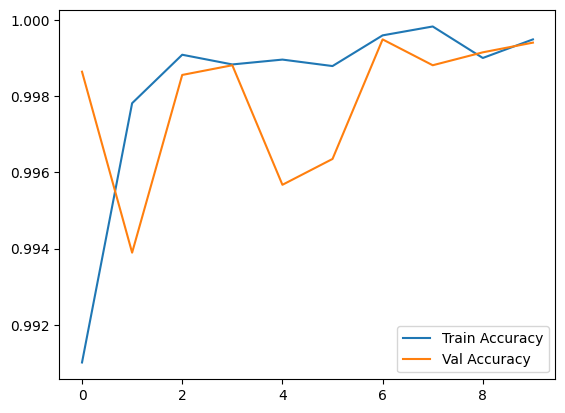

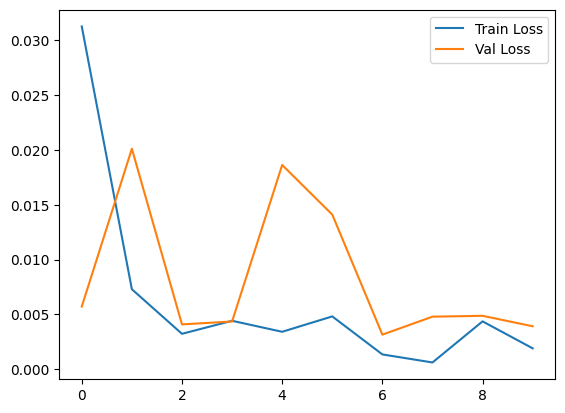

In [15]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()
